# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [2]:
# Your code here
fine_label_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


`x_train` has 50000 images, `x_test` has 10000, as previously mentioned. Each image is 32x32 pixels.

In [3]:
import numpy as np

print("Number of unique classes: ",len(np.unique(y_train)))
print("Number of fine name classes: ",len(fine_label_names))

Number of unique classes:  100
Number of fine name classes:  100


Displaying examples from training dataset


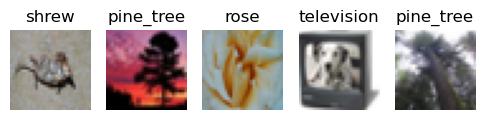

In [4]:
import matplotlib.pyplot as plt

sample_count = 5
fig, axes = plt.subplots(1, sample_count, figsize=(6, 6))
for i in range(sample_count):
  axes[i].imshow(x_train[i+20])
  axes[i].axis('off')
  axes[i].set_title(fine_label_names[y_train[i+20][0]])

print("Displaying examples from training dataset")
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [5]:
# Your code here
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

print("Training data shape:", x_train_normalized.shape)
print("Test data shape:", x_test_normalized.shape)
print("First training image (normalized):", x_train_normalized[0])

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
First training image (normalized): [[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.7647059  0.8039216  0.75686276]
  [0.83137256 0.8784314  0.8       ]
  [0.7137255  0.7607843  0.654902  ]]

 [[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.6666667  0.6901961  0.5882353 ]
  [0.6313726  0.65882355 0.50980395]
  [0.57254905 0.6039216  0.44313726]]

 [[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [1.         1.         1.        ]
  ...
  [0.7411765  0.78039217 0.6627451 ]
  [0.6509804  0.69803923 0.50980395]
  [0.4745098  0.52156866 0.34117648]]

 ...

 [[0.5803922  0.7254902  0.30980393]
  [0.5568628  0.7137255  0.22352941]
  [0.54901963 0.7019608  0.23529412]
  ...
  [0.11764706 0.06666667 0.00392157]
  [0.25490198 0.24313726 0.05882353]
  

In [6]:
from keras.utils import to_categorical

dist_classes = len(np.unique(y_train))
y_train_one_hot = to_categorical(y_train, dist_classes)
y_test_one_hot = to_categorical(y_test, dist_classes)
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [7]:
from sklearn.model_selection import train_test_split

x_train_split, x_valid_split, y_train_split, y_valid_split = train_test_split(
    x_train_normalized, y_train_one_hot, test_size = 0.2,
    random_state = 36
)

print(x_train_split.shape, y_train_split.shape)
print(x_valid_split.shape, y_valid_split.shape)

(40000, 32, 32, 3) (40000, 100)
(10000, 32, 32, 3) (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Your code here
# Create a baseline CNN model
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(dist_classes, activation='softmax')
])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 512)               2

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> categorical_crossentropy

The loss function is employed because the target variable is represented as a one-hot encoded vector, suits the classification tasks. It measures the difference between the true class distribution (the true labels) and the predicted class distribution (the model's predictions). `categorical_crossentropy` is essential for training neural networks in multi-class classification problems, as it effectively measures and guides the model's performance.

- <b>Optimizer:</b> adam

The Adam optimizer combines the benefits of both the AdaGrad and RMSProp algorithms, adapting the learning rate for each parameter. It efficiently handles sparse gradients and noisy data, making it well-suited for a wide range of deep learning tasks. Adam adjusts learning rates based on first and second moments of the gradients, ensuring stable and fast convergence. Its adaptive nature requires minimal tuning, making it a popular choice for optimizing neural networks.

In [9]:
from keras.optimizers import Adam
from keras.metrics import Precision, Recall

# Your code here
# Compile the model
model_1.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy', Precision(), Recall()])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [10]:
# Train the model
result_1 = model_1.fit(
    x_train_split, 
    y_train_split, 
    epochs=15, 
    batch_size=32, 
    validation_data=(x_valid_split, y_valid_split))

Epoch 1/15
1250/1250 [==============================] - 39s 30ms/step - loss: 3.5447 - accuracy: 0.1684 - precision: 0.6365 - recall: 0.0311 - val_loss: 3.1053 - val_accuracy: 0.2440 - val_precision: 0.6000 - val_recall: 0.0807
Epoch 2/15
1250/1250 [==============================] - 40s 32ms/step - loss: 2.7472 - accuracy: 0.3100 - precision: 0.7091 - recall: 0.1194 - val_loss: 2.7383 - val_accuracy: 0.3190 - val_precision: 0.7187 - val_recall: 0.1188
Epoch 3/15
1250/1250 [==============================] - 39s 31ms/step - loss: 2.3379 - accuracy: 0.3982 - precision: 0.7378 - recall: 0.1993 - val_loss: 2.5809 - val_accuracy: 0.3529 - val_precision: 0.6759 - val_recall: 0.1798
Epoch 4/15
1250/1250 [==============================] - 38s 30ms/step - loss: 1.9877 - accuracy: 0.4749 - precision: 0.7689 - recall: 0.2848 - val_loss: 2.5810 - val_accuracy: 0.3634 - val_precision: 0.6475 - val_recall: 0.2147
Epoch 5/15
1250/1250 [==============================] - 45s 36ms/step - loss: 1.6462 - a

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 94.18%
- <b>Other metric:</b> precision & recall
- <b>Reason for selection:</b>

`precision` and `recall` provide a comprehensive view of the model's performance, helping to balance the trade-offs between correctly identifying positives and avoiding false positives. They are especially useful in evaluating models for tasks where accuracy alone might not provide a complete picture of performance.

- <b>Value of metric:</b> precision=0.9526 & recall=0.9305
- <b>Interpretation of metric value:</b>

The provided metrics indicate that the model performs well on the training data but struggles with the validation data:

    Training Metrics:
        `loss`= 0.1872: The low training loss suggests that the model is fitting the training data well, with relatively small errors in its predictions.
        `accuracy`= 0.9418: A high training accuracy of 87.42% indicates that the model correctly classifies most of the training examples.
        `precision`= 0.9526: High precision means the model is accurate when it predicts a positive class, with relatively few false positives.
        `recall`= 0.9305: High recall shows that the model successfully identifies a large proportion of actual positive cases, with relatively few false negatives.

    Validation Metrics:
        `val_loss`= 6.4084: The very high validation loss indicates that the model’s predictions are significantly different from the actual labels on the validation data, suggesting poor generalization.
        `val_accuracy`= 0.3247: The low validation accuracy of 27.38% shows that the model performs poorly on the validation set, identifying only a small fraction of the validation examples correctly.
        `val_precision`= 0.3566: Low validation precision indicates that when the model predicts a positive class on the validation data, it is often incorrect.
        `val_recall`= 0.3105: Low validation recall indicates that the model is failing to identify most of the actual positive cases in the validation set.

Overall Interpretation:
The model shows strong performance on the training data but has a significant gap in performance on the validation data. This discrepancy suggests that the model is overfitting; it learns well from the training data but fails to generalize to unseen validation data. Possible steps to address this could include using regularization techniques, increasing the size of the training set, or improving model architecture to enhance generalization.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

313/313 [==============================] - 2s 5ms/step
CORRECT test prediction count:  2970
INCORRECT test prediction count:  7030


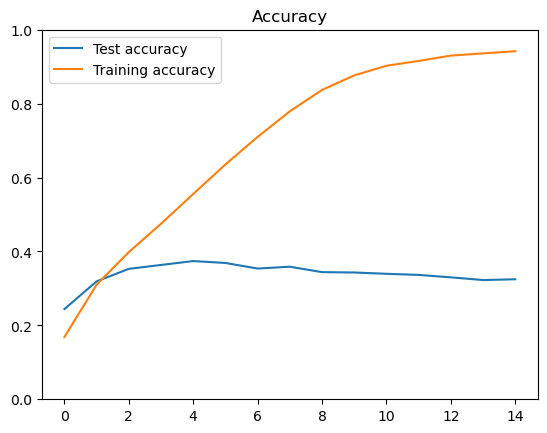

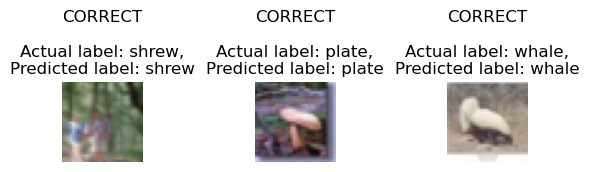

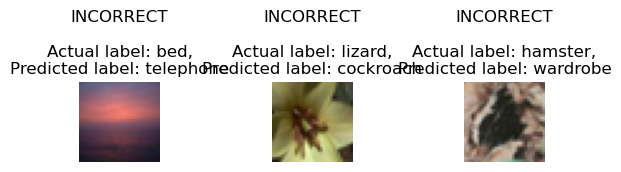

In [14]:
# Your code here
plt.plot(result_1.history['val_accuracy'], label='Test accuracy')
plt.plot(result_1.history['accuracy'], label='Training accuracy')
plt.ylim(0, 1)
plt.legend(loc='best')
plt.title('Accuracy')

# Positive vs Negetive
predictions = model.predict(x_valid_split)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_valid_split, axis=1)
pos_indices = np.where(predicted_labels == true_labels)[0]
neg_indices = np.where(predicted_labels != true_labels)[0]

print("CORRECT test prediction count: ", len(pos_indices))
print("INCORRECT test prediction count: ", len(neg_indices))

plt.figure(figsize=(6, 6))

plt.subplot(1, 5, 1)
plt.imshow(x_test[pos_indices[1]])
plt.title(f"CORRECT\n\nActual label: {fine_label_names[true_labels[pos_indices[1]]]},\nPredicted label: {fine_label_names[predicted_labels[pos_indices[1]]]}")
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(x_test[pos_indices[3]])
plt.title(f"CORRECT\n\nActual label: {fine_label_names[true_labels[pos_indices[3]]]},\nPredicted label: {fine_label_names[predicted_labels[pos_indices[3]]]}")
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(x_test[pos_indices[5]])
plt.title(f"CORRECT\n\nActual label: {fine_label_names[true_labels[pos_indices[5]]]},\nPredicted label: {fine_label_names[predicted_labels[pos_indices[5]]]}")
plt.axis('off')

plt.show()


plt.figure(figsize=(6, 6))

plt.subplot(1, 5, 1)
plt.imshow(x_test[neg_indices[0]])
plt.title(f"INCORRECT\n\nActual label: {fine_label_names[true_labels[neg_indices[0]]]},\nPredicted label: {fine_label_names[predicted_labels[neg_indices[0]]]}")
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(x_test[neg_indices[1]])
plt.title(f"INCORRECT\n\nActual label: {fine_label_names[true_labels[neg_indices[1]]]},\nPredicted label: {fine_label_names[predicted_labels[neg_indices[1]]]}")
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(x_test[neg_indices[2]])
plt.title(f"INCORRECT\n\nActual label: {fine_label_names[true_labels[neg_indices[2]]]},\nPredicted label: {fine_label_names[predicted_labels[neg_indices[2]]]}")
plt.axis('off')

plt.show()

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [16]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential

# Enhanced with dropout
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(dist_classes, activation='softmax'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(dist_classes, activation='softmax')
])

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_6 (Dense)             (None, 512)              

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [13]:
# Your code here

# Compile the model
model_2.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy', Precision(), Recall()])

# Train the model
result_2 = model_2.fit(
    x_train_split, 
    y_train_split, 
    epochs=15, 
    batch_size=32, 
    validation_data=(x_valid_split, y_valid_split))

Epoch 1/15
1250/1250 [==============================] - 37s 29ms/step - loss: 4.3337 - accuracy: 0.0304 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 3.9960 - val_accuracy: 0.0623 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/15
1250/1250 [==============================] - 35s 28ms/step - loss: 3.8355 - accuracy: 0.0878 - precision_1: 0.7033 - recall_1: 0.0016 - val_loss: 3.6158 - val_accuracy: 0.1273 - val_precision_1: 0.6966 - val_recall_1: 0.0062
Epoch 3/15
1250/1250 [==============================] - 31s 25ms/step - loss: 3.5026 - accuracy: 0.1465 - precision_1: 0.6458 - recall_1: 0.0162 - val_loss: 3.3611 - val_accuracy: 0.1781 - val_precision_1: 0.7118 - val_recall_1: 0.0163
Epoch 4/15
1250/1250 [==============================] - 31s 25ms/step - loss: 3.2509 - accuracy: 0.1882 - precision_1: 0.6662 - recall_1: 0.0330 - val_loss: 3.1807 - val_accuracy: 0.2063 - val_precision_1: 0.6991 - val_recall_1: 0.0316
Epoch 5/15
1250/1250 [==================

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

Model 1 significantly outperforms Model 2 across all metrics. Its higher accuracy, precision, and recall on both training and validation sets indicate better generalization. The large discrepancy in validation loss is particularly striking.

Potential reasons for this disparity include differences in model architecture, hyperparameters, or training process. Model 2 might be underfitting or overfitting.

There's clear room for improvement in Model 2. Techniques to explore include hyperparameter tuning, regularization, different model architectures, and feature engineering. Additionally, analyzing the learning curves and confusion matrices can provide valuable insights into the models' behavior.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.